In [2]:
import networkx as nx
from utility_funcs import readcirclefile, read_nodeadjlist, cost_function
import os
import sklearn.cluster
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [3]:
def readfeaturelist(filename):
    """
    reads a featurelist file and returns a list of the feature names
    """
    with open(filename) as f:
        out = []        # list of feature names
        for line in f:
            out.append(line.strip())
        return sorted(out)

In [5]:
features = readfeaturelist('/Users/ishitachawla/Documents/ECE143/learning-social-circles/featureList.txt')
print( features)
print(len(features))

['birthday', 'education;classes;description', 'education;classes;from;id', 'education;classes;from;name', 'education;classes;id', 'education;classes;name', 'education;classes;with;id', 'education;classes;with;name', 'education;concentration;id', 'education;concentration;name', 'education;degree;id', 'education;degree;name', 'education;school;id', 'education;school;name', 'education;type', 'education;with;id', 'education;with;name', 'education;year;id', 'education;year;name', 'first_name', 'gender', 'hometown;id', 'hometown;name', 'id', 'languages;id', 'languages;name', 'last_name', 'locale', 'location', 'location;id', 'location;name', 'middle_name', 'name', 'political', 'religion', 'work;description', 'work;employer;id', 'work;employer;name', 'work;end_date', 'work;from;id', 'work;from;name', 'work;location;id', 'work;location;name', 'work;position;id', 'work;position;name', 'work;projects;description', 'work;projects;end_date', 'work;projects;from;id', 'work;projects;from;name', 'work

In [6]:
def readfeatures(featurefile):
    """
    reads a featurefile consisting of userid feature;value feature;value
    returns a list where index is user id, elements are dictionaries 
    of features as keys pointing to list of values maybe should be sets
    """
    with open(featurefile) as f:
        out = [] 
        for line in f:
            tokens = line.split()
            profile = {}  # empty profile for the user
            for tok in tokens[1:]:
                feature,val = tok.rsplit(';',1)
                val = int(val)
                if feature not in profile:
                    profile[feature]=set([val])
                else:
                    profile[feature].add(val)
            out.append( profile )
        for i in range(len(out)):
            assert out[i]['id'] == set([i])  # check that each line was read and placed in the correct place in the list
        return out

In [7]:
def convert_profile_dict_to_vector(profile,features):
    out = []
    for feature in features:
        if feature in profile:
            out.append(profile[feature])
        else:
            out.append(set())
    return out

In [8]:
def match_vector(profile1,profile2):
    return [len(x.intersection(y)) for x,y in zip(profile1,profile2)]
     

def generate_feature_matrix(profiles_dict,ego,G):
    return [match_vector(profiles_dict[ego], profiles_dict[g]) for g in G.nodes()]
     

def generate_class_matrix(G,true_circles):
    return dict(zip(true_circles.keys(),[[int(g in circle) for g in G.nodes()] for circle in true_circles.values()]))
     

In [9]:
profiles_dict = readfeatures('features.txt')

profile_matrix = [convert_profile_dict_to_vector(profile,features) for profile in profiles_dict]

In [10]:
import matplotlib.pyplot as plt

Total friends: 265
Training Ego: 345 Circle: 28 ...
Training Ego: 345 Circle: 29 ...
Training Ego: 345 Circle: 22 ...
Training Ego: 345 Circle: 20 ...
Training Ego: 345 Circle: 26 ...
Training Ego: 345 Circle: 27 ...
Training Ego: 345 Circle: 24 ...


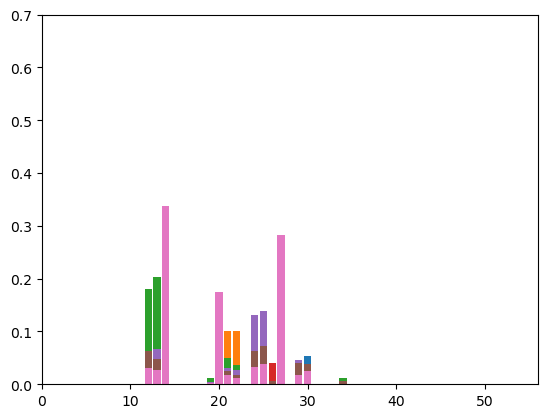

In [ ]:
ego = 345
true_circles = readcirclefile('./Training/'+str(ego)+'.circles')
G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')
print('Total friends:', len(G.nodes()))
class_matrix = generate_class_matrix(G,true_circles)
feature_matrix = generate_feature_matrix(profile_matrix,ego,G)

for label,circle in class_matrix.items():
    print('Training Ego:', ego,'Circle:',label,'...')
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit( feature_matrix, circle )
    important_features = sorted(zip(features,forest.feature_importances_), key=lambda x: x[1], reverse=True)
    importance_scores = [val for key,val in important_features]
    importance_labels = [key for key,val in important_features]
    ind = range(len(importance_scores))
    plt.bar(ind, forest.feature_importances_)
    plt.axis([min(ind), max(ind), 0, 0.7])
    plt.show()

In [17]:
dict(zip(true_circles.keys(),[[int(g in circle) for g in G.nodes()] for circle in true_circles.values()]))


{28: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

Total friends: 265
Training Ego: 345 Circle: 28 ...


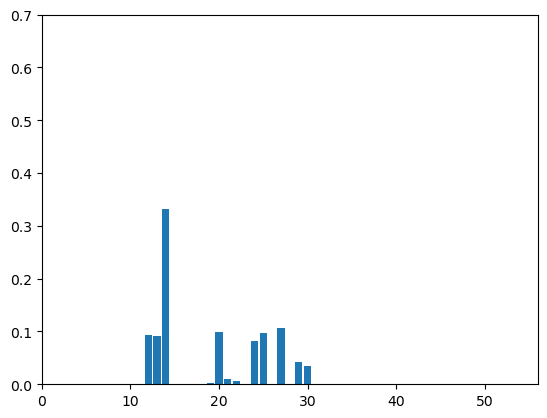

Training Ego: 345 Circle: 29 ...


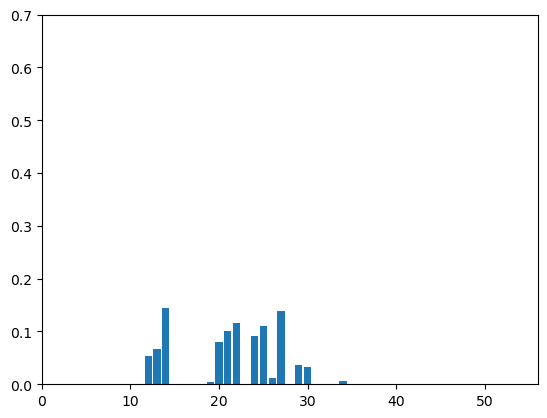

Training Ego: 345 Circle: 22 ...


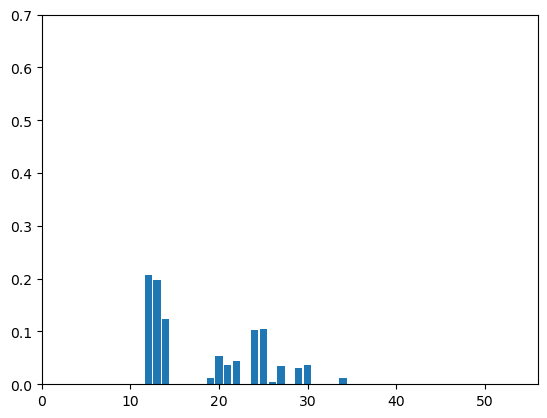

Training Ego: 345 Circle: 20 ...


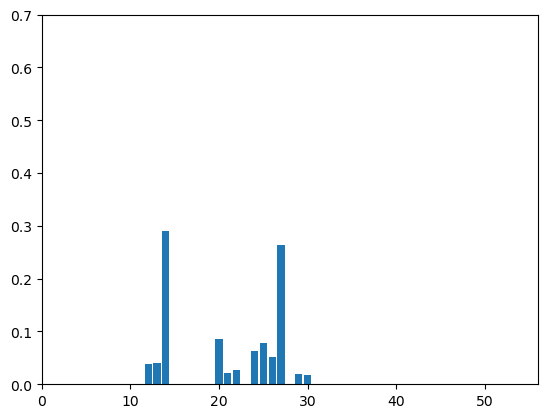

Training Ego: 345 Circle: 26 ...


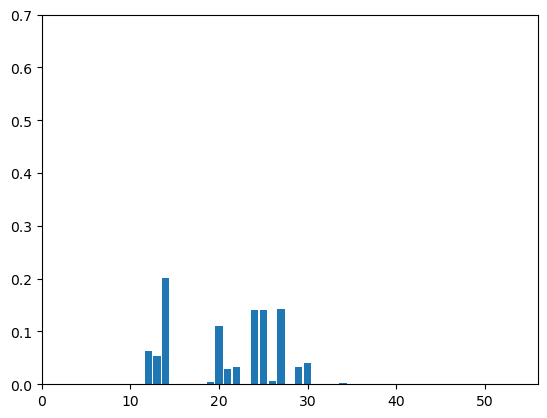

Training Ego: 345 Circle: 27 ...


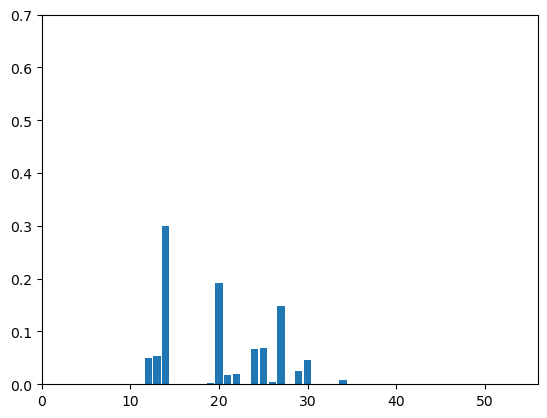

Training Ego: 345 Circle: 24 ...


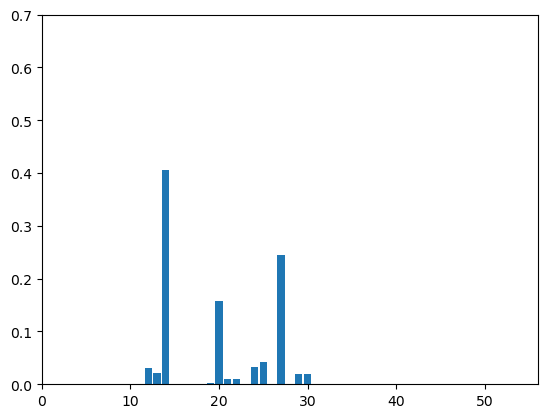

In [19]:
true_circles = readcirclefile('./Training/'+str(ego)+'.circles')
G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')
print('Total friends:', len(G.nodes()))
class_matrix = generate_class_matrix(G,true_circles)
feature_matrix = generate_feature_matrix(profile_matrix,ego,G)

for label,circle in class_matrix.items():
    print('Training Ego:', ego,'Circle:',label,'...')
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit( feature_matrix, circle )
    important_features = sorted(zip(features,forest.feature_importances_), key=lambda x: x[1], reverse=True)
    importance_scores = [val for key,val in important_features]
    importance_labels = [key for key,val in important_features]
    ind = range(len(importance_scores))
    plt.bar(ind, forest.feature_importances_)
    plt.axis([min(ind), max(ind), 0, 0.7])
    plt.show()

In [20]:
trainingfiles = os.listdir('./Training/')

df_labels = ['Ego','Circle']+features
characteristic_profiles = []

for item in trainingfiles:
    ego = int((item.split('.')[0]))
    true_circles = readcirclefile('./Training/'+item)
    G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')
    class_matrix = generate_class_matrix(G,true_circles)
    feature_matrix = generate_feature_matrix(profile_matrix,ego,G)
    
    for label,circle in class_matrix.items():
        print('Training Ego:', ego,'Circle:',label,'...')
        forest = RandomForestClassifier(n_estimators=100)
        forest = forest.fit( feature_matrix, circle )
        characteristic_profiles.append([ego]+[label]+list(forest.feature_importances_))

df = pd.DataFrame(data=characteristic_profiles,columns=df_labels)

Training Ego: 23299 Circle: 731 ...
Training Ego: 23299 Circle: 281 ...
Training Ego: 23299 Circle: 1319 ...
Training Ego: 23299 Circle: 403 ...
Training Ego: 23299 Circle: 1421 ...
Training Ego: 23299 Circle: 1423 ...
Training Ego: 23299 Circle: 1422 ...
Training Ego: 23299 Circle: 1418 ...
Training Ego: 23299 Circle: 1419 ...
Training Ego: 23299 Circle: 13 ...
Training Ego: 23299 Circle: 1420 ...
Training Ego: 23299 Circle: 1424 ...
Training Ego: 23299 Circle: 205 ...
Training Ego: 23299 Circle: 62 ...
Training Ego: 23299 Circle: 1417 ...
Training Ego: 8553 Circle: 709 ...
Training Ego: 8553 Circle: 710 ...
Training Ego: 8553 Circle: 711 ...
Training Ego: 8553 Circle: 706 ...
Training Ego: 8553 Circle: 707 ...
Training Ego: 8553 Circle: 704 ...
Training Ego: 8553 Circle: 13 ...
Training Ego: 8553 Circle: 708 ...
Training Ego: 8553 Circle: 190 ...
Training Ego: 8553 Circle: 62 ...
Training Ego: 13353 Circle: 925 ...
Training Ego: 13353 Circle: 922 ...
Training Ego: 13353 Circle: 918 .

In [21]:
df

,Ego,Circle,birthday,education;classes;description,education;classes;from;id,education;classes;from;name,education;classes;id,education;classes;name,education;classes;with;id,education;classes;with;name,...,work;projects;from;id,work;projects;from;name,work;projects;id,work;projects;name,work;projects;start_date,work;projects;with;id,work;projects;with;name,work;start_date,work;with;id,work;with;name
0,23299,731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044145,0.0,0.0
1,23299,281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033129,0.0,0.0
2,23299,1319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191987,0.0,0.0
3,23299,403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069039,0.0,0.0
4,23299,1421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085259,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,24857,1464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
588,24857,1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
589,24857,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
590,24857,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [22]:
df.mean()

Ego                              12204.152027
Circle                             606.854730
birthday                             0.000571
education;classes;description        0.000000
education;classes;from;id            0.000484
education;classes;from;name          0.000421
education;classes;id                 0.001282
education;classes;name               0.001191
education;classes;with;id            0.000725
education;classes;with;name          0.000673
education;concentration;id           0.009374
education;concentration;name         0.010859
education;degree;id                  0.002470
education;degree;name                0.002347
education;school;id                  0.053162
education;school;name                0.056843
education;type                       0.184268
education;with;id                    0.000230
education;with;name                  0.000242
education;year;id                    0.033632
education;year;name                  0.034050
first_name                        

In [23]:
df.to_csv('characterist_profiles.csv')

In [24]:
df_pos = df[df.min(axis=1)>=0]
df_neg = df[df.min(axis=1)<0]

In [26]:
df_pos_mean = df_pos.mean()
df_pos_mean.sort_values(ascending=False)
rand_chance = (len(df_pos_mean)-2)
df_pos_mean[df_pos_mean.gt(1./(rand_chance))]*rand_chance

Ego                      695636.665541
Circle                    34590.719595
education;school;id           3.030231
education;school;name         3.240077
education;type               10.503280
education;year;id             1.917021
education;year;name           1.940828
gender                        9.969573
hometown;id                   1.574929
hometown;name                 1.562361
last_name                     1.953496
locale                        7.584854
location;id                   1.749857
location;name                 1.781010
work;employer;id              1.062230
work;employer;name            1.493430
work;start_date               1.643719
dtype: float64

In [27]:
df_pos_mean*rand_chance

Ego                              695636.665541
Circle                            34590.719595
birthday                              0.032573
education;classes;description         0.000000
education;classes;from;id             0.027603
education;classes;from;name           0.024025
education;classes;id                  0.073086
education;classes;name                0.067880
education;classes;with;id             0.041337
education;classes;with;name           0.038338
education;concentration;id            0.534304
education;concentration;name          0.618949
education;degree;id                   0.140806
education;degree;name                 0.133786
education;school;id                   3.030231
education;school;name                 3.240077
education;type                       10.503280
education;with;id                     0.013121
education;with;name                   0.013801
education;year;id                     1.917021
education;year;name                   1.940828
first_name   

In [28]:
df_pos.mean()[2:]

birthday                         0.000571
education;classes;description    0.000000
education;classes;from;id        0.000484
education;classes;from;name      0.000421
education;classes;id             0.001282
education;classes;name           0.001191
education;classes;with;id        0.000725
education;classes;with;name      0.000673
education;concentration;id       0.009374
education;concentration;name     0.010859
education;degree;id              0.002470
education;degree;name            0.002347
education;school;id              0.053162
education;school;name            0.056843
education;type                   0.184268
education;with;id                0.000230
education;with;name              0.000242
education;year;id                0.033632
education;year;name              0.034050
first_name                       0.010313
gender                           0.174905
hometown;id                      0.027630
hometown;name                    0.027410
id                               0